<a href="https://colab.research.google.com/github/santiagofloresm/ENEL645-Team25-FinalProject/blob/patrick-Resnet/FinalProject-Phase2_Import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
## Team 25
Santiago Flores - 30119885

Davis Allan - 10016543

Jordan Joorisity - 30117950

Patrick Pickard - 30116807

Joshua Posyluzny - 30118206

Hola

# 1. Loading and pre-processing the dataset

### 1.1 Clone the repository

In [1]:
!git clone -b dev https://github.com/santiagofloresm/ENEL645-Team25-FinalProject.git

Cloning into 'ENEL645-Team25-FinalProject'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 156942 (delta 43), reused 14 (delta 5), pack-reused 156860
Receiving objects: 100% (156942/156942), 2.86 GiB | 19.95 MiB/s, done.
Resolving deltas: 100% (234/234), done.
Checking out files: 100% (168575/168575), done.


In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.2 Define the paths

In [3]:
train_folder = 'ENEL645-Team25-FinalProject/Dataset/Train'
test_folder = 'ENEL645-Team25-FinalProject/Dataset/Alternative_Test'
validation_folder = 'ENEL645-Team25-FinalProject/Dataset/Validation'

### 1.3 Data display

There are 29 classes in the dataset, one for each letter in the English alphabet, one for space, one for delete and a blank one. Below is an exmaple of each one

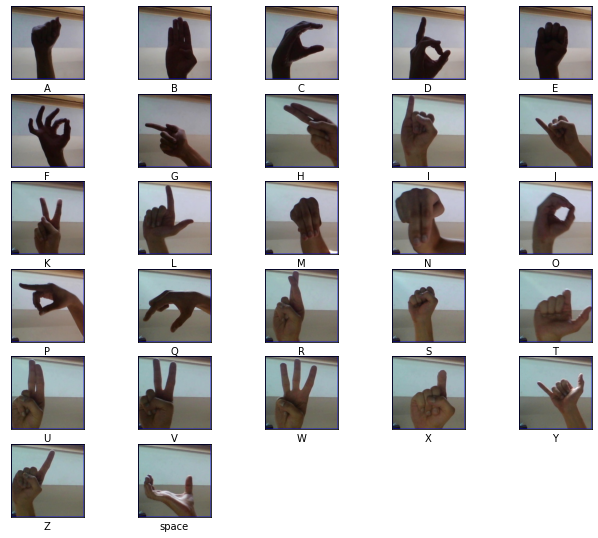

In [4]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'space']

plt.figure(figsize=(11,11))
for i in range (0,27):
  plt.subplot(7,5, i+1)
  plt.xticks([])
  plt.yticks([])
  path = train_folder + "/" + classes[i] + "/" + classes[i] + "2.jpg"
  img = plt.imread(path)
  plt.imshow(img)
  plt.xlabel(classes[i])

### 1.5 Data import and augmentation

In [5]:
from keras.preprocessing.image import ImageDataGenerator

image_input_dimensions_3d = (200,200,3)
image_input_dimensions_2d = (200,200)
batch_size = 32
seed = 32

#### 1.5.1 Training data

In [10]:
# https://keras.io/api/preprocessing/image/
# categorical class_mode will be 2D one-hot encoded labels
# The dictionary containing the mapping from class names to class indices can be obtained via the attribute class_indices

# preprocessing done for Resnet -> causes images to go purplish scale
train_data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input,
                                    horizontal_flip=True,
                                    rotation_range=10,
                                    fill_mode = 'constant',
                                    zoom_range=[0.9, 1.0])

train_generator = train_data_gen.flow_from_directory(train_folder, 
                                                     batch_size=batch_size, 
                                                     seed=seed, 
                                                     target_size=image_input_dimensions_2d,
                                                     interpolation="nearest", 
                                                     class_mode="categorical",
                                                     subset="training")

Found 69600 images belonging to 29 classes.


In [11]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

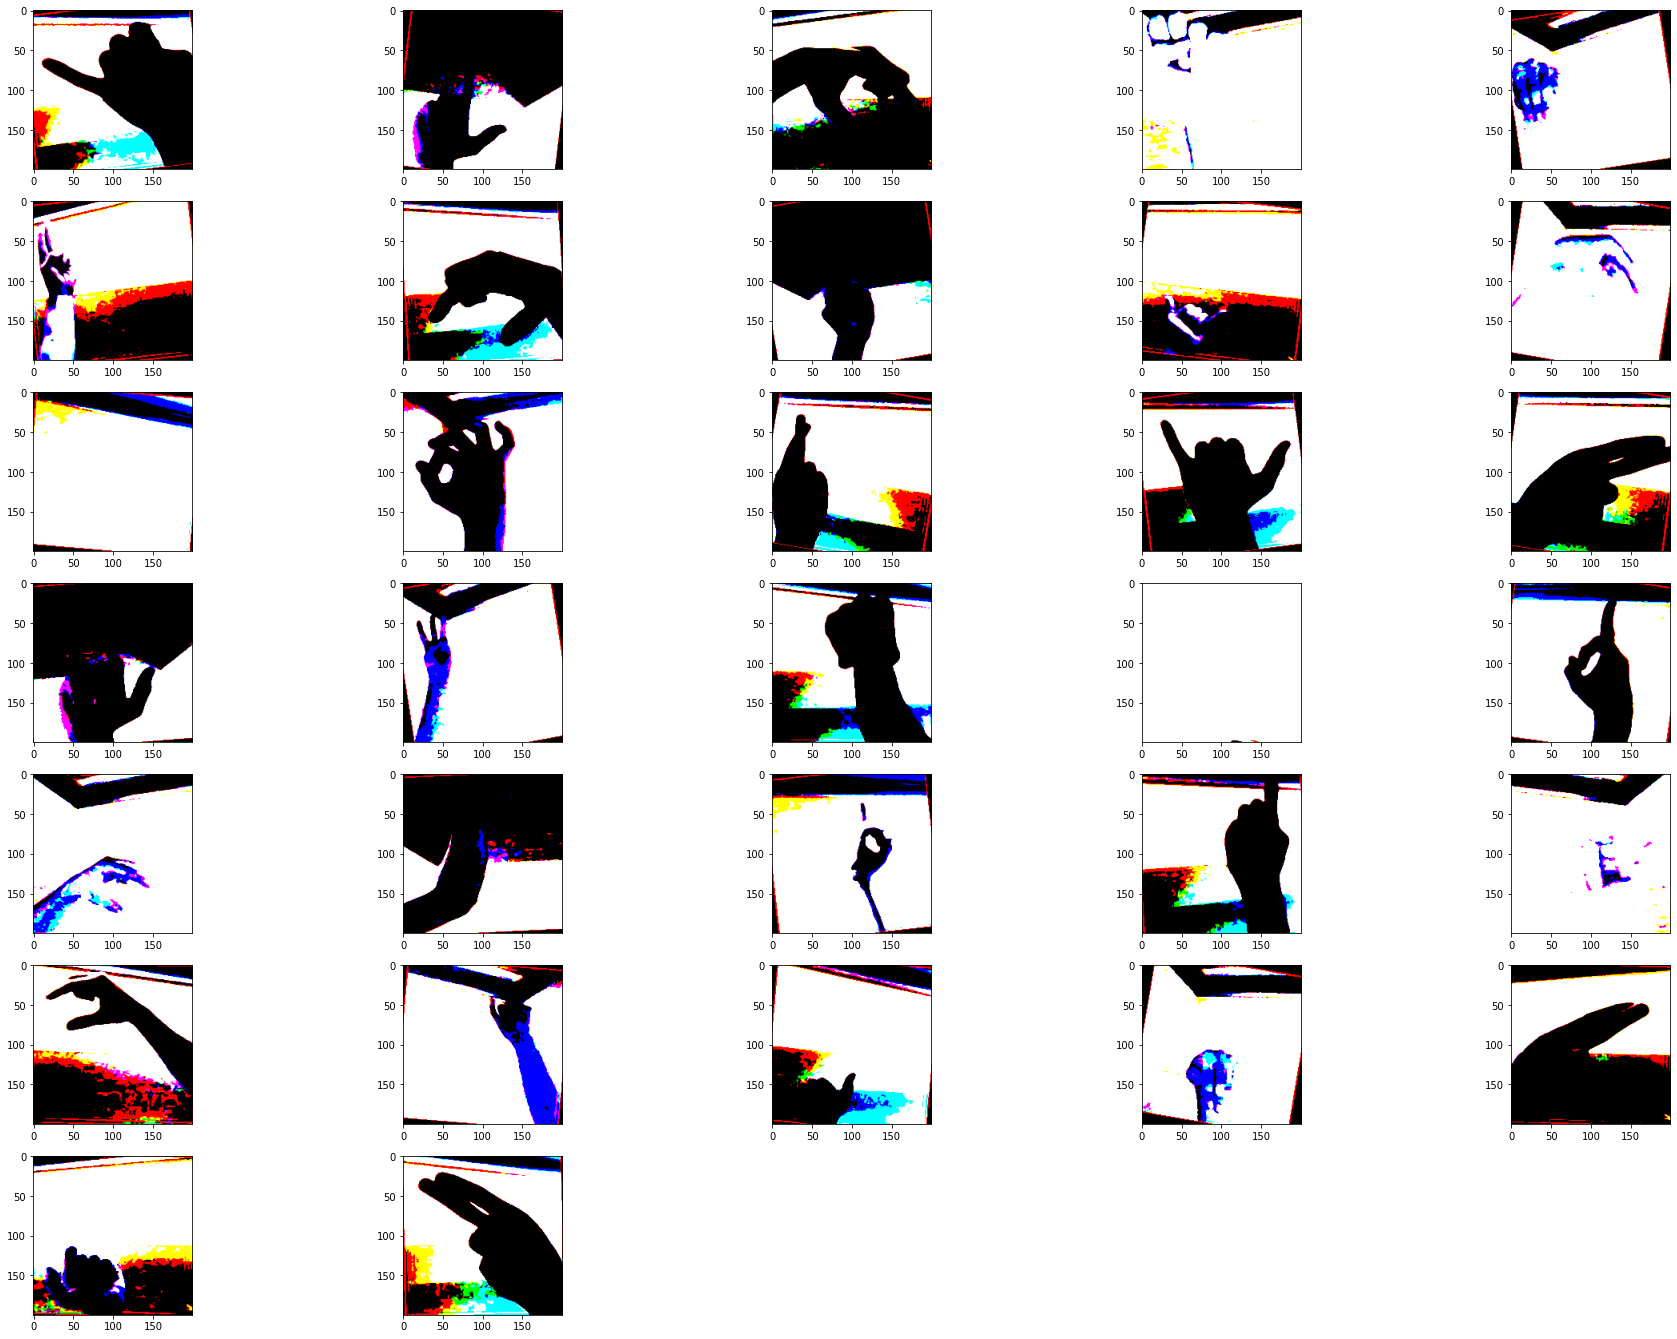

In [12]:
# take a look at some of these images after the pre-processing was done required by the Resnet50 model
plt.figure(figsize = (32,24))
Xbatch, Ybatch = train_generator.__getitem__(0)
for ii in range (batch_size):
  plt.subplot(7,5,ii+1)
  plt.imshow(Xbatch[ii])

plt.show()

### Training image analysis

In [13]:
  h, w, r = train_generator.image_shape
  print('There are', train_generator.samples, 'images for training the model')
  print("Approximately {:.0f} images per category".format(train_generator.samples/train_generator.num_classes))
  print('The shape of each image is', train_generator.image_shape)
  print('From which:')
  print('The width is', w)
  print('The height is', h)
  print('And each pixel has a value for each component of RGB for a total of', r)

There are 69600 images for training the model
Approximately 2400 images per category
The shape of each image is (200, 200, 3)
From which:
The width is 200
The height is 200
And each pixel has a value for each component of RGB for a total of 3


#### 1.5.2 Validation data

In [14]:
# this will load in and do the pre-processing for the validation dataset required by the Resnet50 model

val_data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

val_generator = val_data_gen.flow_from_directory(validation_folder, 
                                                     batch_size=batch_size, 
                                                     seed=seed, 
                                                     target_size=image_input_dimensions_2d,
                                                     interpolation="nearest", 
                                                     class_mode="categorical")

Found 8700 images belonging to 29 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

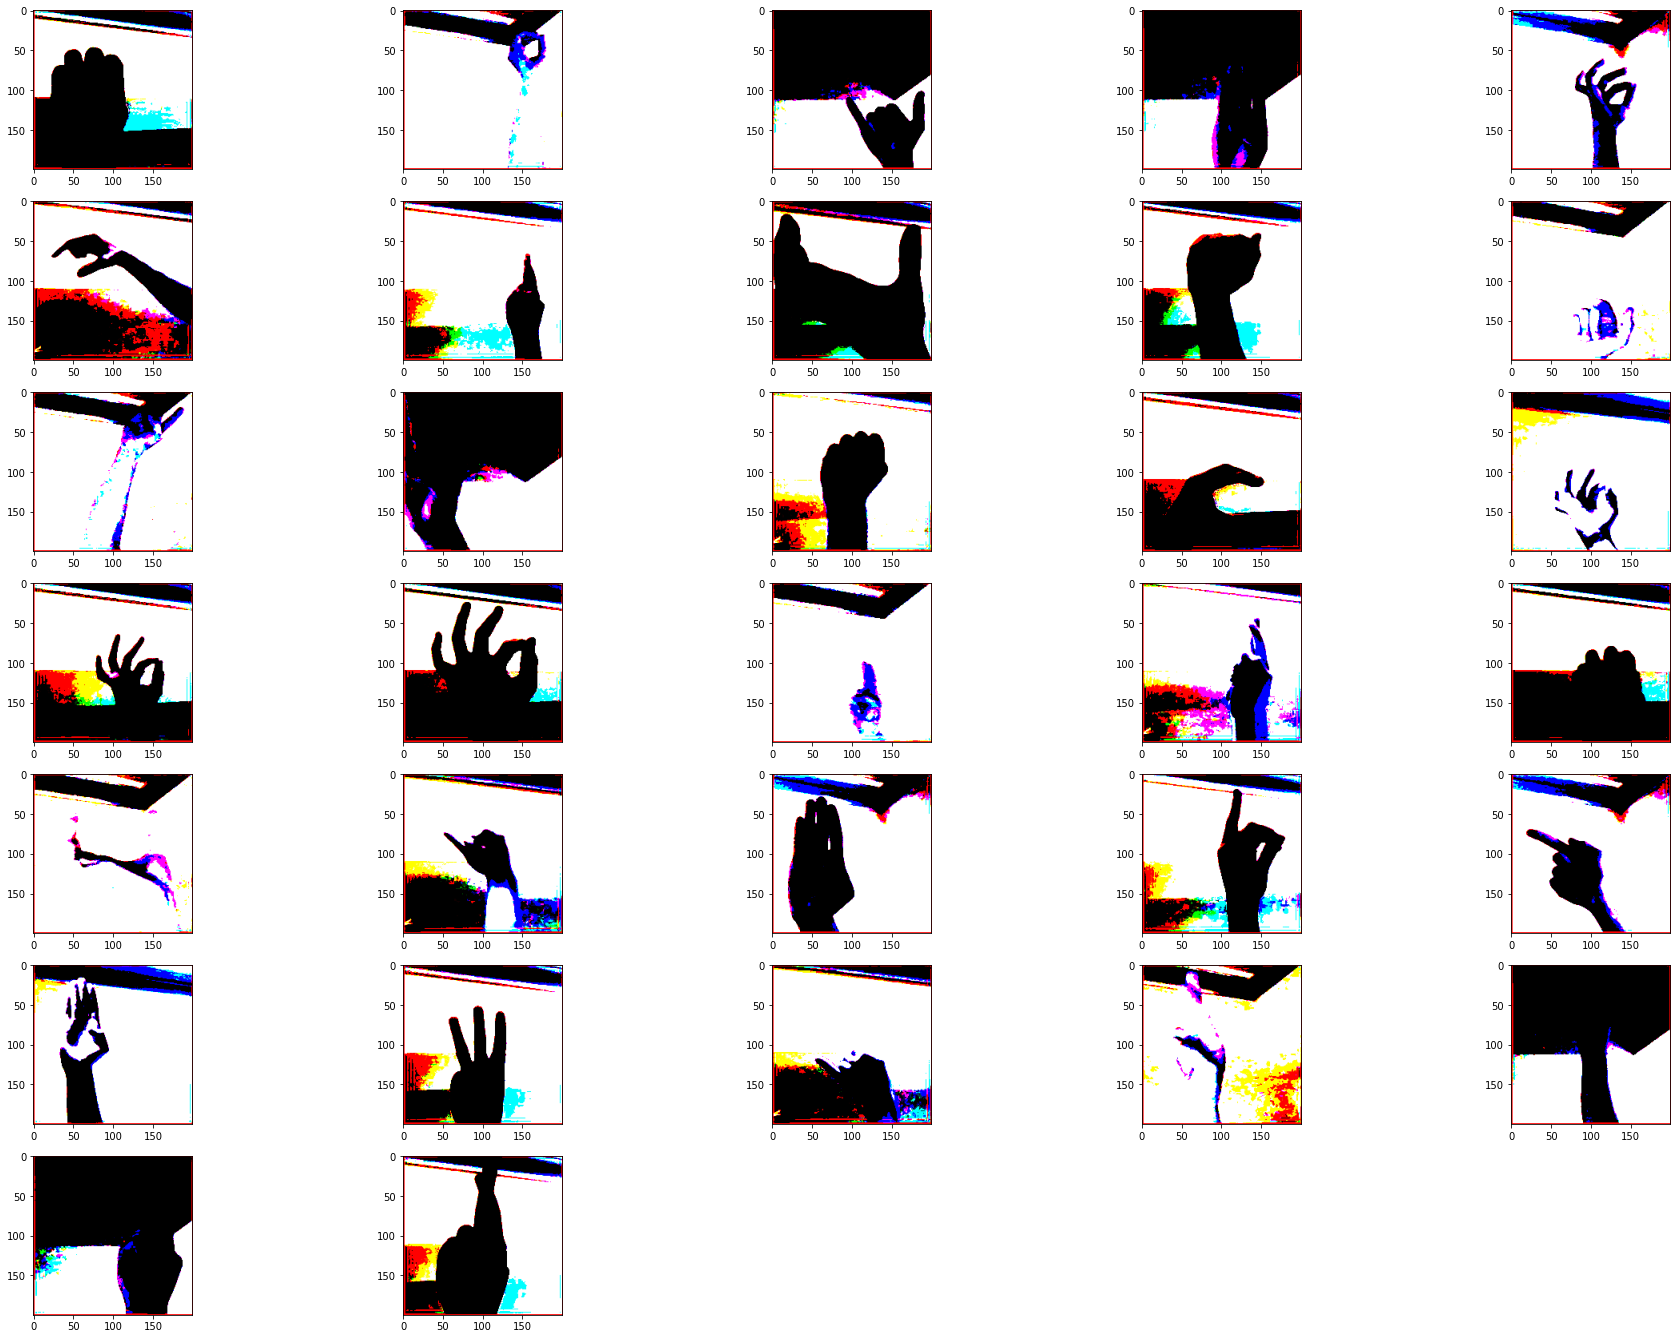

In [15]:
# take a look at some of these images after the pre-processing was done required by the Resnet50 model
plt.figure(figsize = (32,24))
Xbatch_val, Ybatch_val = val_generator.__getitem__(0)
for ii in range (batch_size):
  plt.subplot(7,5,ii+1)
  plt.imshow(Xbatch_val[ii])

plt.show()

#### 1.5.3 Alternative Test data

In [16]:
# this will load in our testing dataset
alternative_test_data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

alternative_test_generator = alternative_test_data_gen.flow_from_directory(test_folder, 
                                                     batch_size=batch_size, 
                                                     seed=seed, 
                                                     target_size=image_input_dimensions_2d,
                                                     interpolation="nearest", 
                                                     class_mode="categorical",
                                                     subset="training")

Found 870 images belonging to 29 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

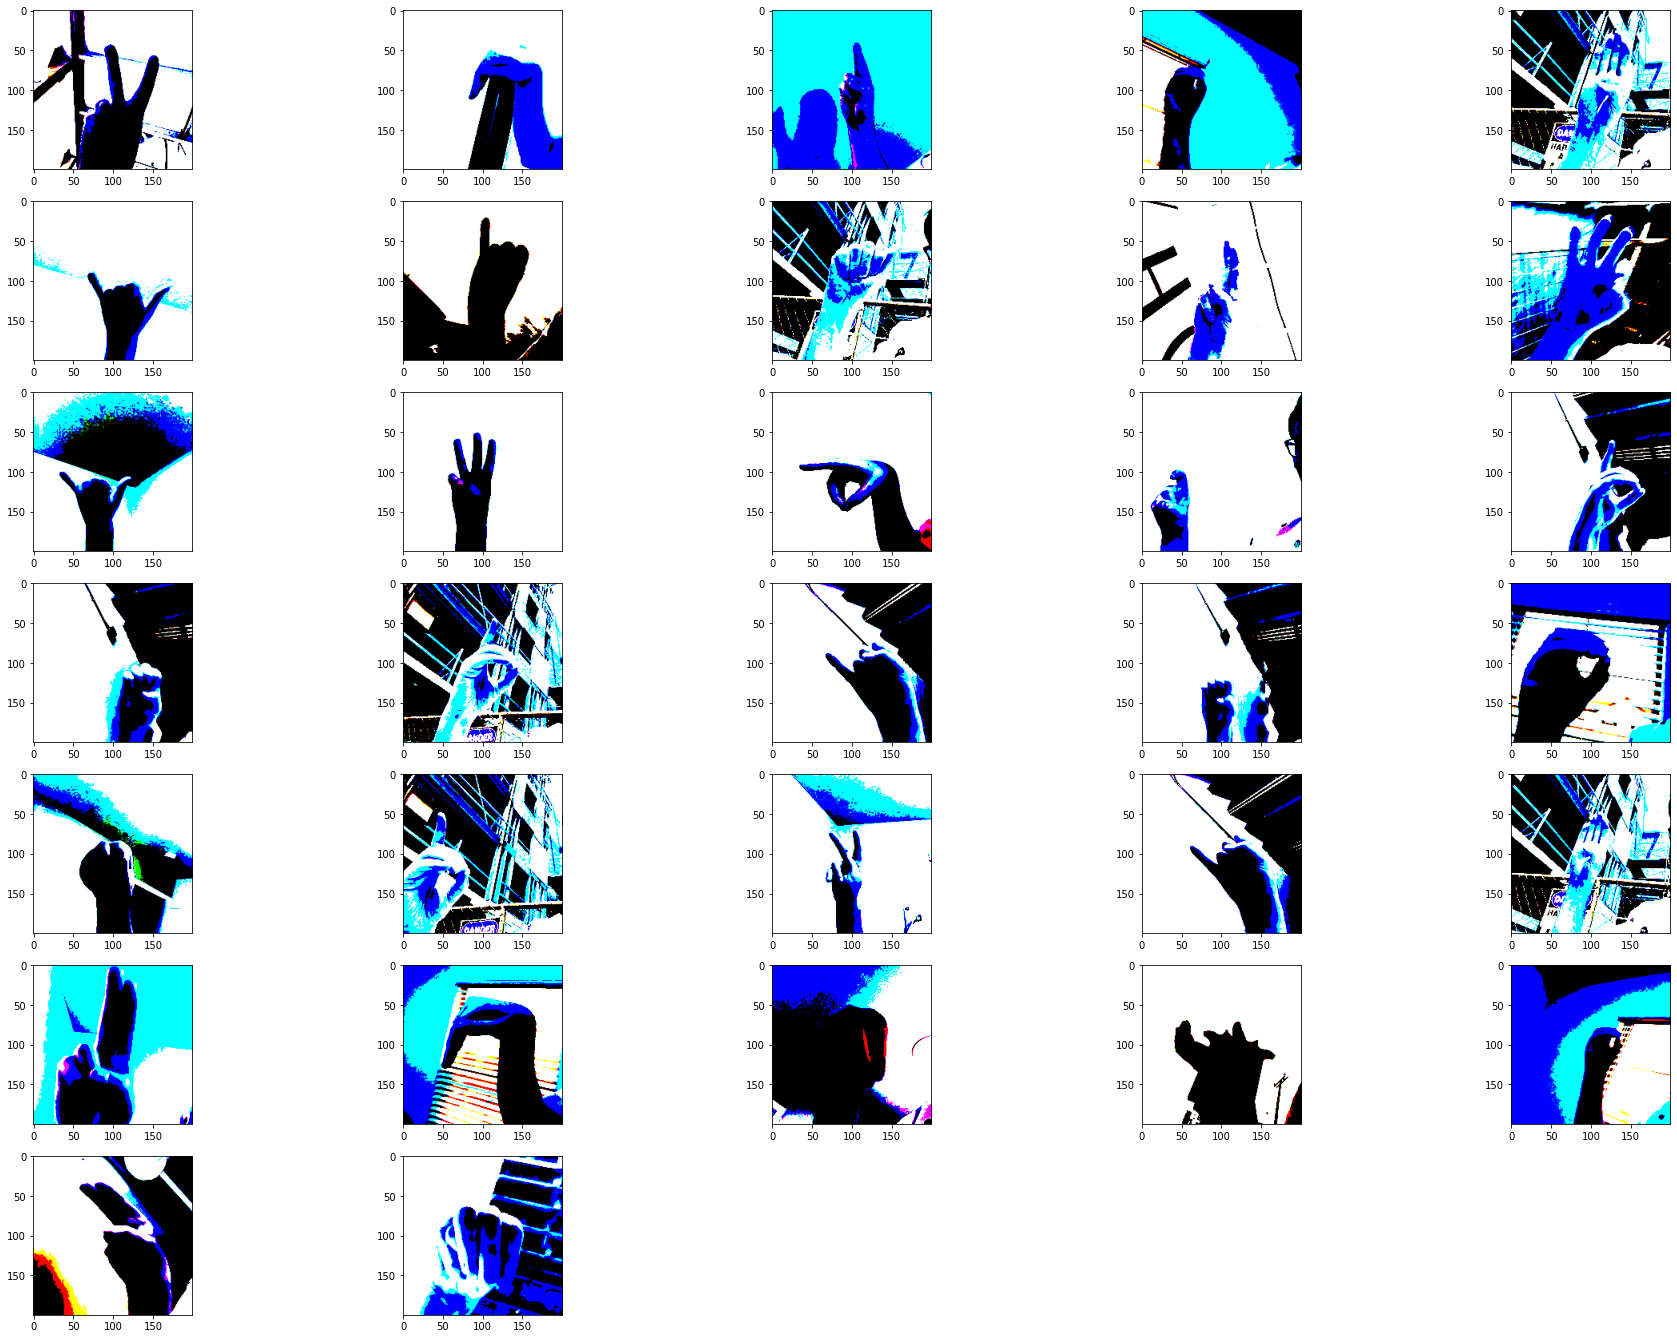

In [17]:
# take a look at some of these images after the pre-processing was done required by the Resnet50 model
plt.figure(figsize = (32,24))
Xbatch_test_alt, Ybatch_test_alt = alternative_test_generator.__getitem__(0)
for ii in range (batch_size):
  plt.subplot(7,5,ii+1)
  plt.imshow(Xbatch_test_alt[ii])

plt.show()

### 1.6 Train test split

In [18]:
print('After the split there are:')
print(train_generator.samples, 'images on the train split')
print(val_generator.samples, 'images on the validation split')
print(alternative_test_generator.samples, 'images on the alternative test split')
print('For each category 90% of the images are in the train split and 10% in the validation split')

After the split there are:
69600 images on the train split
8700 images on the validation split
870 images on the alternative test split
For each category 90% of the images are in the train split and 10% in the validation split



### 2.0 Transfer Learning

### 2.1 Choose and load the pre-trained model without the top

In [19]:
# we will be using the ResNet model for this branch, and compare it to the other models used in our Transfer learning

base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=image_input_dimensions_3d,
)

94773248/94765736 [==============================] - 1s 0us/step


### 2.2 Freeze the layers for this pre-trained model

In [20]:
# this will freeze this portion of the model so that it will not be trained when the .fit() function is called
base_model.trainable = False

In [21]:
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### 2.3 Add a top to this model (top represents the prediction layers)

In [31]:
# specify the hyperparameters for this model
epochs = 10
lr = 1e-4
gradient_clip = 0.1
weight_decay = 1e-4

In [23]:
# this will combine the currently frozen Resnet parameters, with the new 'top' of the model we will define below. This will be trained before we unfreeze the Resnet parameters and test our total model
def model_Resnet(lr=1e-4):
  input_image = tf.keras.Input(shape=(image_input_dimensions_3d))

  x1 = base_model(input_image, training=False)

  flat = tf.keras.layers.Flatten()(x1)
  flat_drop = tf.keras.layers.Dropout(0.1)(flat)
  out = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(flat_drop)

  model = tf.keras.Model(inputs = input_image, outputs = out)

  model.compile(optimizer=tf.keras.optimizers.Adam(
    lr = lr,
    clipvalue = gradient_clip,
    decay = weight_decay),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
    )
  
  return model

model = model_Resnet(lr)

In [24]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 29)                2910237   
Total params: 26,497,949
Trainable params: 2,910,237
Non-trainable params: 23,587,712
_________________________________________________________________
None


### 2.4 Define our model callbacks

In [25]:
# we will define our model callbacks for listening in on the model training and determing when our model is adequately trained, which will then stop the model training at that pre-defined point.

model_name = "transfer_learning_model_for_asl_classification_Resnet50"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, 
                                             monitor = 'val_loss', 
                                             verbose = 0, 
                                             save_best_only = True, 
                                             save_weights_only = True, 
                                             mode = 'min'
                                             )

def scheduler(epoch, lr):
  if epoch % 5 == 0:
    lr = lr/2
  return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

### 2.5 Model training

In [26]:
# fit the model to the training data and check against val
history = model.fit(
    train_generator, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    callbacks=[early_stop, monitor, lr_schedule], 
    validation_data=(val_generator)
    )

Epoch 1/12
2175/2175 [==============================] - 729s 319ms/step - loss: 0.9816 - accuracy: 0.7449 - val_loss: 0.1231 - val_accuracy: 0.9582
Epoch 2/12
2175/2175 [==============================] - 666s 306ms/step - loss: 0.0875 - accuracy: 0.9705 - val_loss: 0.0968 - val_accuracy: 0.9679
Epoch 3/12
2175/2175 [==============================] - 668s 307ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.0499 - val_accuracy: 0.9828
Epoch 4/12
2175/2175 [==============================] - 666s 306ms/step - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.0535 - val_accuracy: 0.9818
Epoch 5/12
2175/2175 [==============================] - 665s 306ms/step - loss: 0.0235 - accuracy: 0.9916 - val_loss: 0.0495 - val_accuracy: 0.9824
Epoch 6/12
2175/2175 [==============================] - 661s 304ms/step - loss: 0.0123 - accuracy: 0.9957 - val_loss: 0.0367 - val_accuracy: 0.9879
Epoch 7/12
2175/2175 [==============================] - 660s 304ms/step - loss: 0.0073 - accuracy: 0.9977 - val_

### 2.6 Re-train model with all layers un-frozen 

In [32]:
# now we will use the same model, but will unfreeze the Resnet layers
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=image_input_dimensions_3d,
)
base_model.trainable = True

In [33]:
# add the same 'top' to this model that we added previously
input_image = tf.keras.Input(shape=(image_input_dimensions_3d))

x1 = base_model(input_image, training=True)

flat = tf.keras.layers.Flatten()(x1)
flat_drop = tf.keras.layers.Dropout(0.1)(flat)
out = tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')(flat_drop)

model = tf.keras.Model(inputs = input_image, outputs = out)

model.compile(optimizer=tf.keras.optimizers.Adam(
  lr = lr,
  clipvalue = gradient_clip,
  decay = weight_decay),
  loss='categorical_crossentropy',
  metrics = ['accuracy']
  )

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                2910237   
Total params: 26,497,949
Trainable params: 26,444,829
Non-trainable params: 53,120
_________________________________________________________________
None


In [34]:
# OUR CALLBACKS WILL REMAIN THE SAME, SO WE DO NOT NEED TO RE-DEFINE THEM

model.load_weights(model_name)

# fit the model on the augmented dataset -> we will use a much smaller learning rate here since we will be training our model with the pre-trained Resnet layers inside of it
# fit the model to the training data and check against val dataset
history = model.fit(
    train_generator, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    callbacks=[early_stop, monitor, lr_schedule], 
    validation_data=(val_generator)
    )

Epoch 1/10
2175/2175 [==============================] - 869s 397ms/step - loss: 0.1768 - accuracy: 0.9573 - val_loss: 0.0963 - val_accuracy: 0.9726
Epoch 2/10
2175/2175 [==============================] - 871s 400ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0594 - val_accuracy: 0.9828
Epoch 3/10
2175/2175 [==============================] - 854s 393ms/step - loss: 0.0113 - accuracy: 0.9959 - val_loss: 0.0366 - val_accuracy: 0.9887
Epoch 4/10
2175/2175 [==============================] - 850s 391ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0265 - val_accuracy: 0.9917
Epoch 5/10
2175/2175 [==============================] - 864s 397ms/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0205 - val_accuracy: 0.9932
Epoch 6/10
2175/2175 [==============================] - 876s 403ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0175 - val_accuracy: 0.9949
Epoch 7/10
2175/2175 [==============================] - 860s 395ms/step - loss: 0.0028 - accuracy: 0.9991 - val_

Saving model training history

In [48]:
import numpy as np

# saving training history to a numpy file
np.save('transfer_learning_model_history.npy', history.history)
model.save("best_model_Resnet50.h5")

Loading model training history

In [41]:
# loading the training history from numpy file, only need to run if we have to access history again
training_history = np.load('/content/transfer_learning_model_history.npy',allow_pickle='TRUE').item()

# 3 Testing the model and extracting relevant metrics

In [42]:
# Load in the model weights we had trained above
model.load_weights(model_name)

### 3.1 Accuracy and training history plots

In [43]:
# test our new model against the test dataset

metrics = model.evaluate(alternative_test_generator)
print("This is the alternative dataset we found, and shows that this model (in its current state), does not generalize well at all.")
print("Categorical cross-entropy:", round(metrics[0], 3))
print("Accuracy:", round(metrics[1]*100, 2),'%')

28/28 [==============================] - 3s 108ms/step - loss: 4.0758 - accuracy: 0.5333
This is the alternative dataset we found, and shows that this model (in its current state), does not generalize well at all.
Categorical cross-entropy: 4.076
Accuracy: 53.33 %


Test loss (cross-entropy and accuracy): [4.153785228729248, 0.5413793325424194]



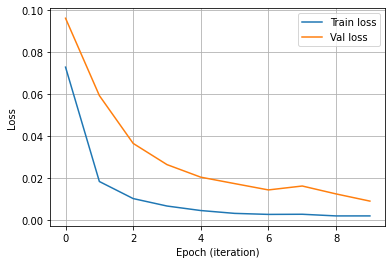

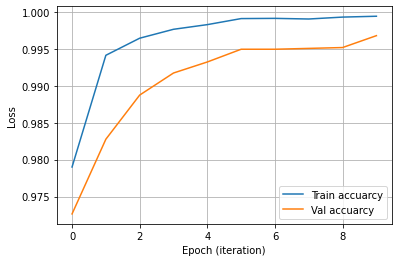

In [44]:
# lets take a look at the training history and accuracy over time of this model

loss = model.evaluate(alternative_test_generator, verbose=0)
print('Test loss (cross-entropy and accuracy):', loss)
print()

plt.plot(training_history['loss'], label = "Train loss")
plt.plot(training_history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(training_history['accuracy'], label = "Train accuarcy")
plt.plot(training_history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### 3.2 Classification Report & Confusion Matrix

#### 3.2.1 Function definitions

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import itertools

In [46]:
# code was acquired from https://www.kaggle.com/danrasband/classifying-images-of-the-asl-alphabet-using-keras

def plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


def plot_confusion_matrix_with_default_options(y_pred, y_true, classes):
    '''Plot a confusion matrix heatmap with a default size and default options.'''
    cm = confusion_matrix(y_true, y_pred)
    with sns.axes_style('ticks'):
        plt.figure(figsize=(12, 12))
        plot_confusion_matrix(cm, classes)
        plt.show()
    return

#### 3.2.2 Visualizing

In [57]:
predictions = model.predict(alternative_test_generator);

In [58]:
# ask model to perform some predictions, and take a look at which classes it performs poorly on
y_pred = np.argmax(predictions, axis=1);
y_true = alternative_test_generator.classes;
class_labels = list(alternative_test_generator.class_indices.keys());

Confusion matrix, without normalization


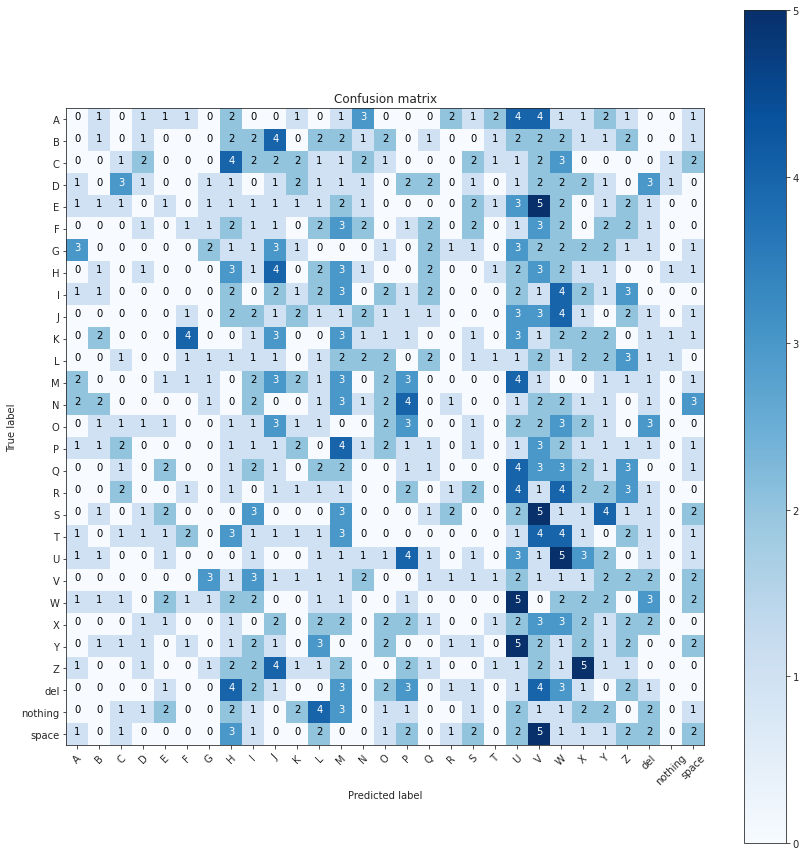

In [59]:
plot_confusion_matrix_with_default_options(y_pred, y_true, class_labels);